# Characteristics of Leavers

## Imports and Cleaning`

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df_telecom = pd.read_csv('telecom_users.csv')
df_telecom.drop('num', axis=1, inplace = True)
df_telecom.drop('customerID', axis=1, inplace = True)
df_telecom.dropna(inplace = True)
                  
df_features = df_telecom

## Preparing Table

In [2]:
pd.set_option('display.max_columns', None)

#df_features['SeniorCitizen'] = np.where(df_features['SeniorCitizen'] == 1, 'Yes', 'No')
 
# populate Household People
df_features['HouseholdPeople'] = 1
df_features.loc[df_features['Partner'] == 'Yes', 'HouseholdPeople'] = df_features['HouseholdPeople'] + 1
df_features.loc[df_features['Dependents'] == 'Yes', 'HouseholdPeople'] = df_features['HouseholdPeople'] + 1

pd.to_numeric(df_features['MonthlyCharges'])

df_yes = df_features[df_features['Churn'] == 'Yes']
df_no = df_features[df_features['Churn'] == 'No']

df_features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HouseholdPeople
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.1,1734.65,No,3
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,1
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,2
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.9,238.50,No,1
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.0,95.00,Yes,2
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.1,2198.30,No,3
5983,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No,3
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes,1


## Demographics

Churn  gender
No     Male      0.512190
       Female    0.487810
Yes    Male      0.501575
       Female    0.498425
Name: gender, dtype: float64


Churn  SeniorCitizen
No     0                0.871497
       1                0.128503
Yes    0                0.746692
       1                0.253308
Name: SeniorCitizen, dtype: float64


Churn  Partner
No     Yes        0.528594
       No         0.471406
Yes    No         0.637051
       Yes        0.362949
Name: Partner, dtype: float64


Churn  Dependents
No     No            0.658237
       Yes           0.341763
Yes    No            0.822936
       Yes           0.177064
Name: Dependents, dtype: float64


Churn  HouseholdPeople
No     1                  0.416951
       2                  0.295739
       3                  0.287309
Yes    1                  0.595463
       2                  0.269061
       3                  0.135476
Name: HouseholdPeople, dtype: float64


avg no household 1.8703577124629756
avg yes household 1.540

<AxesSubplot:xlabel='Churn,HouseholdPeople'>

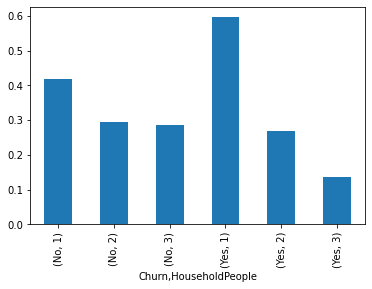

In [12]:
gender = df_features.groupby(['Churn'])['gender'].value_counts(normalize = True)
print(gender)
print('\n')

senior = df_features.groupby(['Churn'])['SeniorCitizen'].value_counts(normalize = True)
print(senior)
print('\n')

partner = df_features.groupby(['Churn'])['Partner'].value_counts(normalize = True)
print(partner)
print('\n')

dependents= df_features.groupby(['Churn'])['Dependents'].value_counts(normalize = True)
print(dependents)
print('\n')

householdpeople = df_features.groupby(['Churn'])['HouseholdPeople'].value_counts(normalize = True)
print(householdpeople)
print('\n')
householdpeople.to_csv('household.csv')

house_avgs = df_features.groupby(['Churn'])['HouseholdPeople'].mean()
print(house_avgs)

# graph
df_features.groupby(['Churn'])['HouseholdPeople'].value_counts(normalize = True).plot(kind='bar')

Insights:

insignificant characteristics: 
* gender

minor significant characteristics:  
* senior citizens 13% more prominent in leavers

significant characteristics:  
* having a partner (meaning 2 people) is 16% higher in stayers
* having dependents (meaning 1 or more people) is 17% higher in stayers
* household people (calculated field) has an avg of 1.87 people for stayers and 1.54 people for leavers (are many of the people staying families and leaving individuals/couples?)  

# Services

Churn  PhoneService  MultipleLines   
No     No            No phone service    1.000000
       Yes           No                  0.538734
                     Yes                 0.461266
Yes    No            No phone service    1.000000
       Yes           Yes                 0.502782
                     No                  0.497218
Name: MultipleLines, dtype: float64


Churn  InternetService
No     DSL                0.379813
       Fiber optic        0.349966
       No                 0.270221
Yes    Fiber optic        0.687461
       DSL                0.250158
       No                 0.062382
Name: InternetService, dtype: float64


Churn  OnlineSecurity
No     No                0.543241
       Yes               0.456759
Yes    No                0.834677
       Yes               0.165323
Name: OnlineSecurity, dtype: float64


Churn  OnlineBackup
No     Yes             0.511083
       No              0.488917
Yes    No              0.697581
       Yes             0.302419
Name: 

<AxesSubplot:xlabel='Churn,InternetService'>

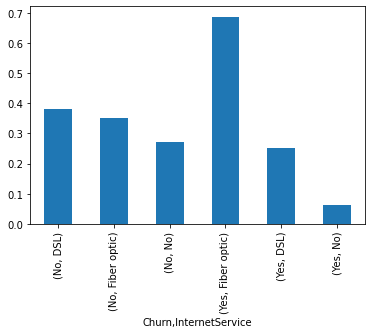

In [17]:
phone_lines = df_features.groupby(['Churn', 'PhoneService'])['MultipleLines'].value_counts(normalize = True)
print(phone_lines)
print('\n')

internet = df_features.groupby(['Churn'])['InternetService'].value_counts(normalize = True)
print(internet)
print('\n')
internet.to_csv('internet.csv')

#remove rows with "No internet service" from table
df_no_int = df_features.replace(to_replace = 'No internet service', value = np.nan)
df_no_int.dropna()

security = df_no_int.groupby(['Churn'])['OnlineSecurity'].value_counts(normalize = True)
print(security)
print('\n') 

backup = df_no_int.groupby(['Churn'])['OnlineBackup'].value_counts(normalize = True)
print(backup)
print('\n')

protection = df_no_int.groupby(['Churn'])['DeviceProtection'].value_counts(normalize = True)
print(protection)
print('\n')

support = df_no_int.groupby(['Churn'])['TechSupport'].value_counts(normalize = True)
print(support)
print('\n')

tv = df_no_int.groupby(['Churn'])['StreamingTV'].value_counts(normalize = True)
print(tv)
print('\n')

movies = df_no_int.groupby(['Churn'])['StreamingMovies'].value_counts(normalize = True)
print(movies)
print('\n')

df_features.groupby(['Churn'])['InternetService'].value_counts(normalize = True).plot(kind = 'bar')

Insights:
~those with no internet removed from table
    
insignificant factors:
* multiple lines      
    
significant factors: 
* leavers favor fiber optic by 34% and only 7% have no Internet compared to 27% of stayers with no internet (tech savy?)  
* add-ons (device protection, tech support, online backup, oneline security) always favored by stayers  
* having streaming tv or stream internet is roughly 50% for both parties with slight preference for stayers

# Payment

Churn  Contract      
No     Month-to-month    0.426293
       Two year          0.316929
       One year          0.256778
Yes    Month-to-month    0.880907
       One year          0.093258
       Two year          0.025835
Name: Contract, dtype: float64


Churn  PaperlessBilling
No     Yes                 0.534062
       No                  0.465938
Yes    Yes                 0.744171
       No                  0.255829
Name: PaperlessBilling, dtype: float64


Churn  PaymentMethod            
No     Credit card (automatic)      0.251538
       Electronic check             0.251538
       Mailed check                 0.250399
       Bank transfer (automatic)    0.246525
Yes    Electronic check             0.568368
       Mailed check                 0.165721
       Bank transfer (automatic)    0.141147
       Credit card (automatic)      0.124764
Name: PaymentMethod, dtype: float64


Churn  PaymentMethod              PaperlessBilling
No     Bank transfer (automatic)  Yes             

<AxesSubplot:xlabel='Churn,PaymentMethod'>

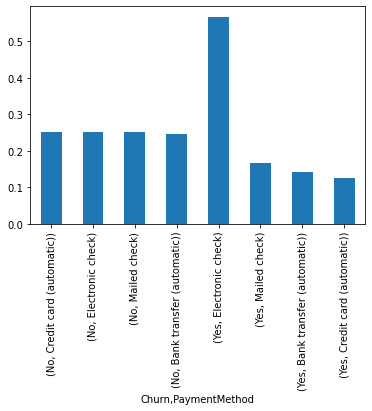

In [18]:
contract = df_features.groupby(['Churn'])['Contract'].value_counts(normalize=True)
print(contract)
print('\n')

billing0 = df_features.groupby(['Churn'])['PaperlessBilling'].value_counts(normalize=True)
print(billing0)
print('\n')
billing0.to_csv('billing0.csv')

billing = df_features.groupby(['Churn'])['PaymentMethod'].value_counts(normalize=True)
print(billing)
print('\n')
billing.to_csv('paymentmethod.csv')

billing_paperless = df_features.groupby(['Churn','PaymentMethod'])['PaperlessBilling'].value_counts(normalize=True)
print(billing_paperless)

df_features.groupby(['Churn'])['PaymentMethod'].value_counts(normalize=True).plot(kind='bar')

Insights:
month-to-month contracts preferred by 44%
electronic billing preferred by stayers by 31%
paperless billing preferred by leavers by 21%

Are leavers tech-savy (electronic billing and paperless billing) and temporarily trying out service?   

# Tenure

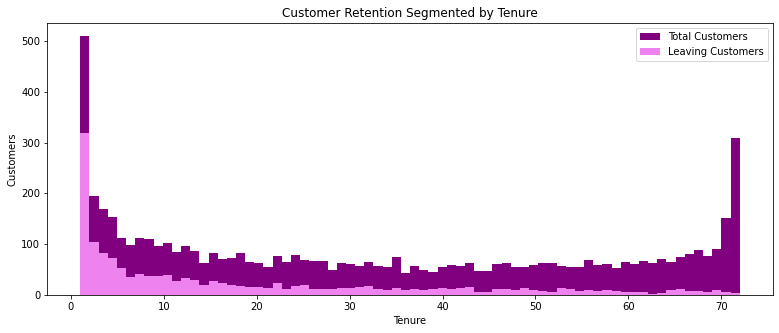

In [19]:
#font = {'size'   : 14}
#mpl.rc('font', **font)

plt.figure(figsize=(13, 5), dpi=72)

plt.hist(df_features['tenure'], bins=72, color="purple")
plt.hist(df_yes['tenure'], bins=72, color="violet")
plt.legend(['Total Customers', 'Leaving Customers'])
plt.title('Customer Retention Segmented by Tenure')
plt.ylabel('Customers')
plt.xlabel('Tenure')
plt.savefig('retention_hist.jpg')

Insights:  
    
* total customers at end large compared to amount leaving who joined at the same time (roughly 300 to 5)

* of total customers in beginning periods, many are leaving this month (just in this month!) of the original (over 60% for a tenure of 1)  

* while leaving customers look low over middle tenure, these are the leaving customers for just this month

# Total Charges Over Tenure

In [ ]:
plt.figure(figsize=(20, 10), dpi=100)

sns.lmplot(x='tenure', y='TotalCharges', data=df_features, hue='Churn', markers =['o', 'v'], palette='magma', aspect=1.3, legend=False)
plt.title('Total Charges by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('totalcharges.jpg')

Insights: ~this graph also acts as a histograph

* many leavers start at different price ranges, filter out, and remain towards the top of the total charges amount while stayers cover a larger range of prices  

* can use high total charges to target leavers

* total charges overall increase over time for everyone  

* unclear whether total charges are higher because leavers buy more expensive services, are charged more, or a combination



# Monthly Charges Over Tenure (Part of Services for Leavers)

<Figure size 2500x1000 with 0 Axes>

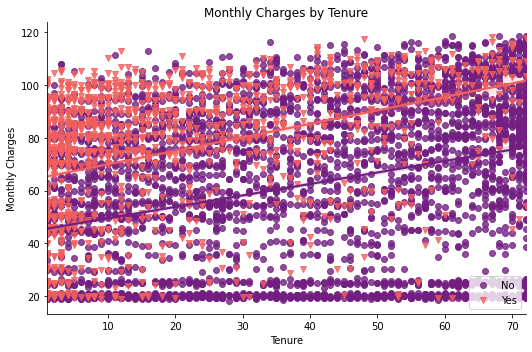

In [20]:
plt.figure(figsize=(25, 10), dpi=100)

df_features['MonthlyCharges'] = pd.to_numeric(df_features['MonthlyCharges'], downcast='float')

sns.lmplot(x='tenure', y='MonthlyCharges', data=df_features, hue='Churn', markers =['o', 'v'], palette='magma', aspect=1.5, legend=False)
plt.title('Monthly Charges by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('monthlycharges.jpg')


<ipython-input-22-6c03ba471c0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yes['Service'] = 'Other'
C:\Users\ricem\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


<Figure size 2000x1000 with 0 Axes>

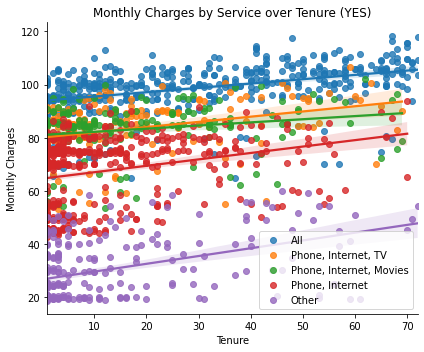

In [22]:
df_yes['MonthlyCharges'] = pd.to_numeric(df_yes['MonthlyCharges'], downcast='float')

df_yes['Service'] = 'Other'
df_yes.loc[(df_yes['InternetService'].isin(['DSL', 'Fiber optic']) & (df_yes['PhoneService'] == 'Yes') & (df_yes['StreamingTV'] == 'Yes') & (df_yes['StreamingMovies'] == 'Yes')), 'Service'] = 'All'
df_yes.loc[(df_yes['InternetService'].isin(['DSL', 'Fiber optic']) & (df_yes['PhoneService'] == 'Yes') & (df_yes['StreamingTV'] == 'No') & (df_yes['StreamingMovies'] == 'No')), 'Service'] = 'Phone, Internet'
df_yes.loc[(df_yes['InternetService'].isin(['DSL', 'Fiber optic']) & (df_yes['PhoneService'] == 'Yes') & (df_yes['StreamingTV'] == 'Yes') & (df_yes['StreamingMovies'] == 'No')), 'Service'] = 'Phone, Internet, TV'
df_yes.loc[(df_yes['InternetService'].isin(['DSL', 'Fiber optic']) & (df_yes['PhoneService'] == 'Yes') & (df_yes['StreamingTV'] == 'No') & (df_yes['StreamingMovies'] == 'Yes')), 'Service'] = 'Phone, Internet, Movies'

plt.figure(figsize=(20, 10), dpi=100)
g = sns.lmplot(x='tenure', y='MonthlyCharges', data=df_yes, hue='Service', hue_order=['All', 'Phone, Internet, TV', 'Phone, Internet, Movies', 'Phone, Internet', 'Other'], aspect=1.2, legend=False)
plt.title('Monthly Charges by Service over Tenure (YES)')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('monthly_service_yes.jpg')

<ipython-input-24-7fdd896eefd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no['MonthlyCharges'] = pd.to_numeric(df_no['MonthlyCharges'], downcast='float')
<ipython-input-24-7fdd896eefd7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no['Service'] = 'Other'


<Figure size 2000x1000 with 0 Axes>

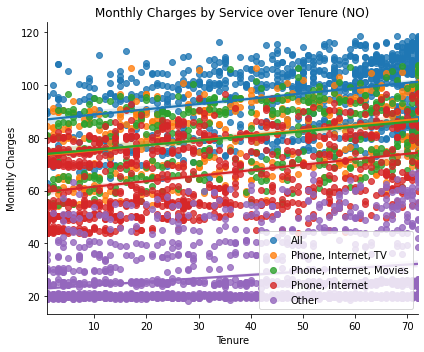

In [24]:
df_no['MonthlyCharges'] = pd.to_numeric(df_no['MonthlyCharges'], downcast='float')

df_no['Service'] = 'Other'
df_no.loc[(df_no['InternetService'].isin(['DSL', 'Fiber optic']) & (df_no['PhoneService'] == 'Yes') & (df_no['StreamingTV'] == 'Yes') & (df_no['StreamingMovies'] == 'Yes')), 'Service'] = 'All'
df_no.loc[(df_no['InternetService'].isin(['DSL', 'Fiber optic']) & (df_no['PhoneService'] == 'Yes') & (df_no['StreamingTV'] == 'No') & (df_no['StreamingMovies'] == 'No')), 'Service'] = 'Phone, Internet'
df_no.loc[(df_no['InternetService'].isin(['DSL', 'Fiber optic']) & (df_no['PhoneService'] == 'Yes') & (df_no['StreamingTV'] == 'Yes') & (df_no['StreamingMovies'] == 'No')), 'Service'] = 'Phone, Internet, TV'
df_no.loc[(df_no['InternetService'].isin(['DSL', 'Fiber optic']) & (df_no['PhoneService'] == 'Yes') & (df_no['StreamingTV'] == 'No') & (df_no['StreamingMovies'] == 'Yes')), 'Service'] = 'Phone, Internet, Movies'

plt.figure(figsize=(20, 10), dpi=100)
sns.lmplot(x='tenure', y='MonthlyCharges', data=df_no,  hue='Service', aspect=1.2, hue_order=['All', 'Phone, Internet, TV', 'Phone, Internet, Movies', 'Phone, Internet', 'Other'], legend=False)
plt.title('Monthly Charges by Service over Tenure (NO)')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('monthly_service_no.jpg')

Insights:

* monthly charges always higher for leavers for all services and phone and Internet

* all initial prices are higher for leavers (according to regression line)

* all:  $97 compared to $88;
phone, internet, tv:  $80 to $75;
phone, internet, movie:  $80 to $75;
phone, internet:  $63 to $60
